**Загружка библиотек**

In [1]:
import pandas as pd
import joblib
import warnings
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, cross_validate


**Load and preprocess data**


In [2]:
warnings.filterwarnings("ignore")

# Загружаем данные о преступности из файла
# Данные описывают статистику преступности в различных регионах
crime_data = pd.read_csv('crimedata.csv')
pd.set_option('display.max.columns', None)
crime_data.head()

,communityName,state,countyCode,communityCode,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,OwnOccQrange,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.0,NaN,0,0.0,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2186.7,3.84,NaN,NaN,NaN,NaN,0.0,NaN,0,0.0,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,3

In [3]:

suffixes = ['township', 'city', 'borough']
for suffix in suffixes:
    crime_data['communityName'] = crime_data['communityName'].str.replace(suffix, '', regex=True)

crime_data.head()

,communityName,state,countyCode,communityCode,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,OwnOccQrange,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeights,NJ,39.0,5320.0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.0,NaN,0,0.0,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marple,PA,45.0,47616.0,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2186.7,3.84,NaN,NaN,NaN,NaN,0.0,NaN,0,0.0,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigard,OR,NaN,NaN,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150

**Очистка данных**

In [4]:
crime_data.info()
crime_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 146 entries, communityName to nonViolPerPop
dtypes: float64(116), int64(28), object(2)
memory usage: 2.5+ MB


(2215, 146)

In [5]:
missing_values = crime_data.isnull().sum().sort_values(ascending=False)

# Отобразим столбцы с наибольшим количеством пропущенных значений
missing_values[missing_values > 0]

PctPolicBlack           1872
PolicAveOTWorked        1872
PolicOperBudg           1872
LemasPctPolicOnPatr     1872
LemasGangUnitDeploy     1872
NumKindsDrugsSeiz       1872
PolicBudgPerPop         1872
OfficAssgnDrugUnits     1872
PctPolicMinor           1872
PctPolicAsian           1872
PctPolicHisp            1872
PctPolicWhite           1872
RacialMatchCommPol      1872
PolicPerPop             1872
PolicReqPerOffic        1872
LemasTotReqPerPop       1872
LemasTotalReq           1872
LemasSwFTFieldPerPop    1872
LemasSwFTFieldOps       1872
LemasSwFTPerPop         1872
LemasSwornFT            1872
PolicCars               1872
communityCode           1224
countyCode              1221
ViolentCrimesPerPop      221
rapesPerPop              208
rapes                    208
nonViolPerPop             97
arsonsPerPop              91
arsons                    91
assaultPerPop             13
assaults                  13
burglaries                 3
burglPerPop                3
larcPerPop    

In [6]:
# Удалим столбцы, в которых более 50% значений отсутствуют
threshold = 0.5 * len(crime_data)  # 50% от общего количества записей
cleaned_data = crime_data.dropna(axis=1, thresh=threshold)

# Проверим размер очищенных данных
cleaned_data.shape

(2215, 122)

In [7]:
# Проверяем наличие дубликатов
duplicates = cleaned_data.duplicated().sum()
if duplicates > 0:
    print(f"Найдено {duplicates} дубликатов. Удаляем...")
    cleaned_data = cleaned_data.drop_duplicates()

# Проверяем на наличие строк с некорректными данными (например, отрицательные значения)
for col in cleaned_data.select_dtypes(include=['float64', 'int64']):
    if (cleaned_data[col] < 0).any():
        print(f"Обнаружены отрицательные значения в столбце {col}.")
        # Исправляем или удаляем такие строки
        cleaned_data = cleaned_data[cleaned_data[col] >= 0]

In [8]:
# Разделим данные на числовые и категориальные столбцы
numeric_cols = cleaned_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = cleaned_data.select_dtypes(include=['object']).columns

# Заполним пропуски в числовых данных медианой
cleaned_data[numeric_cols] = cleaned_data[numeric_cols].fillna(cleaned_data[numeric_cols].median())

# Заполним пропуски в категориальных данных наиболее частым значением
cleaned_data[categorical_cols] = cleaned_data[categorical_cols].fillna(cleaned_data[categorical_cols].mode().iloc[0])

# Проверим, остались ли пропуски
remaining_missing = cleaned_data.isnull().sum().sum()
remaining_missing

np.int64(0)

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Определим целевую переменную и признаки
target_column = 'ViolentCrimesPerPop'  # Целевая переменная
features = cleaned_data.drop(columns=[target_column, 'communityName', 'state'])  # Исключим категориальные

# Убедимся, что данные числовые и без пропусков
features = features.select_dtypes(include=['float64', 'int64'])

X = features
y = cleaned_data[target_column]

from xgboost import XGBRegressor

# Используем XGBoost для отбора значимых признаков
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X, y)

# Получим важность признаков
feature_importances = xgb_model.feature_importances_

# Создаем DataFrame для сортировки
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Выбираем все значимые признаки с ненулевой важностью
selected_features = importance_df.head(15)['Feature']

# Удалить два признака из selected_features
features_to_remove = ['NumUnderPov']
filtered_features = selected_features[~selected_features.isin(features_to_remove)]

filtered_features



109          assaultPerPop
104                  rapes
107            robbbPerPop
105            rapesPerPop
50     PctKidsBornNeverMar
103             murdPerPop
49     NumKidsBornNeverMar
80            OwnOccMedVal
39          MalePctNevMarr
71              HousVacant
5              racePctHisp
43              PctFam2Par
67         PctPersOwnOccup
113             larcPerPop
Name: Feature, dtype: object

In [10]:
selected_X = X[filtered_features]
selected_X.head()


,assaultPerPop,rapes,robbbPerPop,rapesPerPop,PctKidsBornNeverMar,murdPerPop,NumKidsBornNeverMar,OwnOccMedVal,MalePctNevMarr,HousVacant,racePctHisp,PctFam2Par,PctPersOwnOccup,larcPerPop
0,32.81,0.0,8.20,0.00,0.36,0.0,31,262600,26.38,64,1.88,91.43,91.46,1132.08
1,102.05,1.0,21.26,4.25,0.24,0.0,43,164200,27.99,240,0.85,86.91,89.03,1598.78
2,38.74,6.0,154.95,16.60,0.88,8.3,164,90400,25.78,544,2.35,78.54,64.18,4972.19
3,190.93,10.0,57.86,57.86,3.84,0.0,561,49600,28.15,669,0.70,64.02,58.18,4142.56
4,112.14,7.0,32.04,26.92,4.70,0.0,402,43200,50.66,333,0.52,58.59,58.13,8490.87


In [11]:
# Объединяем выбранные признаки и целевую переменную для удобства обработки
data_for_outlier = pd.concat([selected_X, y], axis=1)

# Используем метод IQR для обнаружения выбросов
Q1 = data_for_outlier.quantile(0.25)
Q3 = data_for_outlier.quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем данные, удаляя выбросы
data_no_outliers = data_for_outlier[~((data_for_outlier < lower_bound) | (data_for_outlier > upper_bound)).any(axis=1)]

# Проверяем размерность данных до и после
print(f"Размер данных до удаления выбросов: {data_for_outlier.shape}")
print(f"Размер данных после удаления выбросов: {data_no_outliers.shape}")

Размер данных до удаления выбросов: (2215, 15)
Размер данных после удаления выбросов: (1343, 15)


In [12]:
# Обновляем X и y
X_no_outliers = data_no_outliers.drop(columns=[target_column])
y_no_outliers = data_no_outliers[target_column]

**Стандартизация**

In [13]:
from sklearn.preprocessing import StandardScaler

# Создаем экземпляр StandardScaler
scaler = StandardScaler()

# Обучаем scaler и преобразуем данные
X_scaled = scaler.fit_transform(X_no_outliers)

# Преобразуем обратно в DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_no_outliers.columns)


**Устранение дисбаланса классов**

In [14]:
y_transformed = np.sqrt(y_no_outliers)


**Обучение ИИ**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Разделим новый набор данных на тренировочную и тестовую выборки
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_scaled, y_transformed, test_size=0.2, random_state=42)

# Список моделей для тестирования на значимых признаках
models_selected = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42)
}

# Результаты моделей
results_selected = {}

# Тестирование моделей на значимых признаках
for model_name, model in models_selected.items():
    # Обучение модели
    model.fit(X_train_selected, y_train)
    # Предсказания
    y_pred = model.predict(X_test_selected)
    # Метрики
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results_selected[model_name] = {"MSE": mse, "MAE": mae, "R2 Score": r2}

for model_name, metrics in results_selected.items():
    print(f"Model: {model_name}")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  MAE: {metrics['MAE']:.4f}")
    print(f"  R2 Score: {metrics['R2 Score']:.4f}\n")



Model: Random Forest Regressor
  MSE: 1.2690
  MAE: 0.5995
  R2 Score: 0.9704

Model: Gradient Boosting Regressor
  MSE: 0.9089
  MAE: 0.6222
  R2 Score: 0.9788

Model: XGBoost Regressor
  MSE: 1.6062
  MAE: 0.5773
  R2 Score: 0.9625



In [16]:
from sklearn.model_selection import RandomizedSearchCV

# Определяем диапазоны гиперпараметров для XGBoost
param_distributions_xgb = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Настройка RandomizedSearchCV для XGBoost
random_search_xgb = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions=param_distributions_xgb,
    n_iter=50,  # Количество случайных комбинаций
    cv=3,  # Кросс-валидация
    scoring='neg_mean_squared_error',  # Метрика оценки
    random_state=42,
    n_jobs=-1  # Использование всех процессоров
)

# Запускаем поиск
random_search_xgb.fit(X_train_selected, y_train)

# Лучшая комбинация гиперпараметров
best_xgb_params = random_search_xgb.best_params_

# Оценка модели с лучшими параметрами
best_xgb_model = random_search_xgb.best_estimator_
best_xgb_pred = best_xgb_model.predict(X_test_selected)

# Метрики
best_xgb_mse = mean_squared_error(y_test, best_xgb_pred)
best_xgb_mae = mean_absolute_error(y_test, best_xgb_pred)
best_xgb_r2 = r2_score(y_test, best_xgb_pred)

# Вывод результатов
print("Best XGBoost Parameters:", best_xgb_params)
print("\nTuned XGBoost Model Performance:")
print(f"  Mean Squared Error (MSE): {best_xgb_mse:.4f}")
print(f"  Mean Absolute Error (MAE): {best_xgb_mae:.4f}")
print(f"  R2 Score: {best_xgb_r2:.4f}")


Best XGBoost Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}

Tuned XGBoost Model Performance:
  Mean Squared Error (MSE): 0.7215
  Mean Absolute Error (MAE): 0.4839
  R2 Score: 0.9831


In [17]:
param_distributions_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Настройка RandomizedSearchCV для Random Forest
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_distributions_rf,
    n_iter=50,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# Запускаем поиск для Random Forest
random_search_rf.fit(X_train_selected, y_train)

# Лучшая комбинация гиперпараметров для Random Forest
best_rf_params = random_search_rf.best_params_

# Оценка модели Random Forest с лучшими параметрами
best_rf_model = random_search_rf.best_estimator_
best_rf_pred = best_rf_model.predict(X_test_selected)

# Метрики для Random Forest
best_rf_mse = mean_squared_error(y_test, best_rf_pred)
best_rf_mae = mean_absolute_error(y_test, best_rf_pred)
best_rf_r2 = r2_score(y_test, best_rf_pred)

# Вывод результатов Random Forest
print("Best Random Forest Parameters:", best_rf_params)
print("\nTuned Random Forest Model Performance:")
print(f"  Mean Squared Error (MSE): {best_rf_mse:.4f}")
print(f"  Mean Absolute Error (MAE): {best_rf_mae:.4f}")
print(f"  R2 Score: {best_rf_r2:.4f}")

Best Random Forest Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10}

Tuned Random Forest Model Performance:
  Mean Squared Error (MSE): 1.2392
  Mean Absolute Error (MAE): 0.6040
  R2 Score: 0.9711


In [18]:
param_distributions_gb = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Настройка RandomizedSearchCV для Gradient Boosting
random_search_gb = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=param_distributions_gb,
    n_iter=50,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# Запускаем поиск для Gradient Boosting
random_search_gb.fit(X_train_selected, y_train)

# Лучшая комбинация гиперпараметров для Gradient Boosting
best_gb_params = random_search_gb.best_params_

# Оценка модели Gradient Boosting с лучшими параметрами
best_gb_model = random_search_gb.best_estimator_
best_gb_pred = best_gb_model.predict(X_test_selected)

# Метрики для Gradient Boosting
best_gb_mse = mean_squared_error(y_test, best_gb_pred)
best_gb_mae = mean_absolute_error(y_test, best_gb_pred)
best_gb_r2 = r2_score(y_test, best_gb_pred)

# Вывод результатов Gradient Boosting
print("Best Gradient Boosting Parameters:", best_gb_params)
print("\nTuned Gradient Boosting Model Performance:")
print(f"  Mean Squared Error (MSE): {best_gb_mse:.4f}")
print(f"  Mean Absolute Error (MAE): {best_gb_mae:.4f}")
print(f"  R2 Score: {best_gb_r2:.4f}")

Best Gradient Boosting Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.05}

Tuned Gradient Boosting Model Performance:
  Mean Squared Error (MSE): 0.9486
  Mean Absolute Error (MAE): 0.4834
  R2 Score: 0.9778


In [19]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Define base models
base_models = [
    ('xgb', best_xgb_model),
    ('gb', best_gb_model),
    ('rf', best_rf_model)
]

# Define meta-model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Train stacking model
stacking_model.fit(X_train_selected, y_train)

# Evaluate stacking model
stacking_pred = stacking_model.predict(X_test_selected)
mse = mean_squared_error(y_test, stacking_pred)
mae = mean_absolute_error(y_test, stacking_pred)
r2 = r2_score(y_test, stacking_pred)
print(f"Stacked Ensemble - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")


Stacked Ensemble - MSE: 0.7313, MAE: 0.4782, R2: 0.9829


**Определяем стратегию кросс-валидации**


In [20]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [21]:
# Список моделей для тестирования
models_selected = {
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42)
}

# Результаты моделей
results_selected = {}

# Тестирование моделей с кросс-валидацией
for model_name, model in models_selected.items():
    # Оценка модели с помощью кросс-валидации на данных без выбросов
    scores = cross_validate(
        model, X_scaled, y_transformed, cv=cv,
        scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
        return_train_score=False
    )
    # Сохраняем средние метрики
    results_selected[model_name] = {
        "MSE": -scores['test_neg_mean_squared_error'].mean(),
        "MAE": -scores['test_neg_mean_absolute_error'].mean(),
        "R2 Score": scores['test_r2'].mean()
    }

# Вывод результатов
for model_name, metrics in results_selected.items():
    print(f"Model: {model_name}")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  MAE: {metrics['MAE']:.4f}")
    print(f"  R2 Score: {metrics['R2 Score']:.4f}\n")


Model: Random Forest Regressor
  MSE: 1.2422
  MAE: 0.6290
  R2 Score: 0.9734

Model: Gradient Boosting Regressor
  MSE: 1.0198
  MAE: 0.6242
  R2 Score: 0.9783

Model: XGBoost Regressor
  MSE: 1.2461
  MAE: 0.5889
  R2 Score: 0.9732



In [22]:
# Запускаем поиск
random_search_xgb.fit(X_no_outliers, y_transformed)

# Лучшая комбинация гиперпараметров
best_xgb_params = random_search_xgb.best_params_
best_xgb_model = random_search_xgb.best_estimator_

# Оценка лучшей модели XGBoost
scores_xgb = cross_validate(
    best_xgb_model, X_scaled, y_transformed, cv=cv,
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=False
)
print("Best XGBoost Parameters:", best_xgb_params)
print("\nTuned XGBoost Model Performance after Outlier Removal (Cross-Validation):")
print(f"  MSE: {-scores_xgb['test_neg_mean_squared_error'].mean():.4f}")
print(f"  MAE: {-scores_xgb['test_neg_mean_absolute_error'].mean():.4f}")
print(f"  R2 Score: {scores_xgb['test_r2'].mean():.4f}")

# Запускаем поиск
random_search_rf.fit(X_scaled, y_transformed)

# Лучшая комбинация гиперпараметров
best_rf_params = random_search_rf.best_params_
best_rf_model = random_search_rf.best_estimator_

# Оценка лучшей модели Random Forest
scores_rf = cross_validate(
    best_rf_model, X_scaled, y_transformed, cv=cv,
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=False
)
print("Best Random Forest Parameters:", best_rf_params)
print("\nTuned Random Forest Model Performance after Outlier Removal (Cross-Validation):")
print(f"  MSE: {-scores_rf['test_neg_mean_squared_error'].mean():.4f}")
print(f"  MAE: {-scores_rf['test_neg_mean_absolute_error'].mean():.4f}")
print(f"  R2 Score: {scores_rf['test_r2'].mean():.4f}")

# Запускаем поиск
random_search_gb.fit(X_scaled, y_transformed)

# Лучшая комбинация гиперпараметров
best_gb_params = random_search_gb.best_params_
best_gb_model = random_search_gb.best_estimator_

# Оценка лучшей модели Gradient Boosting
scores_gb = cross_validate(
    best_gb_model, X_scaled, y_transformed, cv=cv,
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=False
)
print("Best Gradient Boosting Parameters:", best_gb_params)
print("\nTuned Gradient Boosting Model Performance after Outlier Removal (Cross-Validation):")
print(f"  MSE: {-scores_gb['test_neg_mean_squared_error'].mean():.4f}")
print(f"  MAE: {-scores_gb['test_neg_mean_absolute_error'].mean():.4f}")
print(f"  R2 Score: {scores_gb['test_r2'].mean():.4f}")




Best XGBoost Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}

Tuned XGBoost Model Performance after Outlier Removal (Cross-Validation):
  MSE: 0.7069
  MAE: 0.4768
  R2 Score: 0.9848
Best Random Forest Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10}

Tuned Random Forest Model Performance after Outlier Removal (Cross-Validation):
  MSE: 1.2050
  MAE: 0.6224
  R2 Score: 0.9742
Best Gradient Boosting Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.05}

Tuned Gradient Boosting Model Performance after Outlier Removal (Cross-Validation):
  MSE: 0.6544
  MAE: 0.4629
  R2 Score: 0.9859


In [23]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Определяем базовые модели с лучшими гиперпараметрами
base_models = [
    ('xgb', best_xgb_model),
    ('gb', best_gb_model),
    ('rf', best_rf_model)
]

# Определяем мета-модель
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

stacking_model.fit(X_scaled, y_transformed)

# Оценка ансамблевой модели с кросс-валидацией
scores_stacking = cross_validate(
    stacking_model, X_scaled, y_transformed, cv=cv,
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    return_train_score=False
)

print("\nStacked Ensemble Model Performance (Cross-Validation):")
print(f"  MSE: {-scores_stacking['test_neg_mean_squared_error'].mean():.4f}")
print(f"  MAE: {-scores_stacking['test_neg_mean_absolute_error'].mean():.4f}")
print(f"  R2 Score: {scores_stacking['test_r2'].mean():.4f}")



Stacked Ensemble Model Performance (Cross-Validation):
  MSE: 0.5785
  MAE: 0.4552
  R2 Score: 0.9875


In [24]:
import joblib

# Сохранение модели
joblib.dump(stacking_model, 'crime_model.pkl')

# Если вы использовали StandardScaler, сохраните и его
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

**Корреляция**

In [25]:
import pandas as pd

# Предполагаем, что у вас есть DataFrame с признаками X и целевая переменная y
# Если вы используете выбранные признаки после отбора
data = pd.concat([selected_X, y], axis=1)

# Вычисляем корреляционную матрицу
correlation_matrix = data.corr()


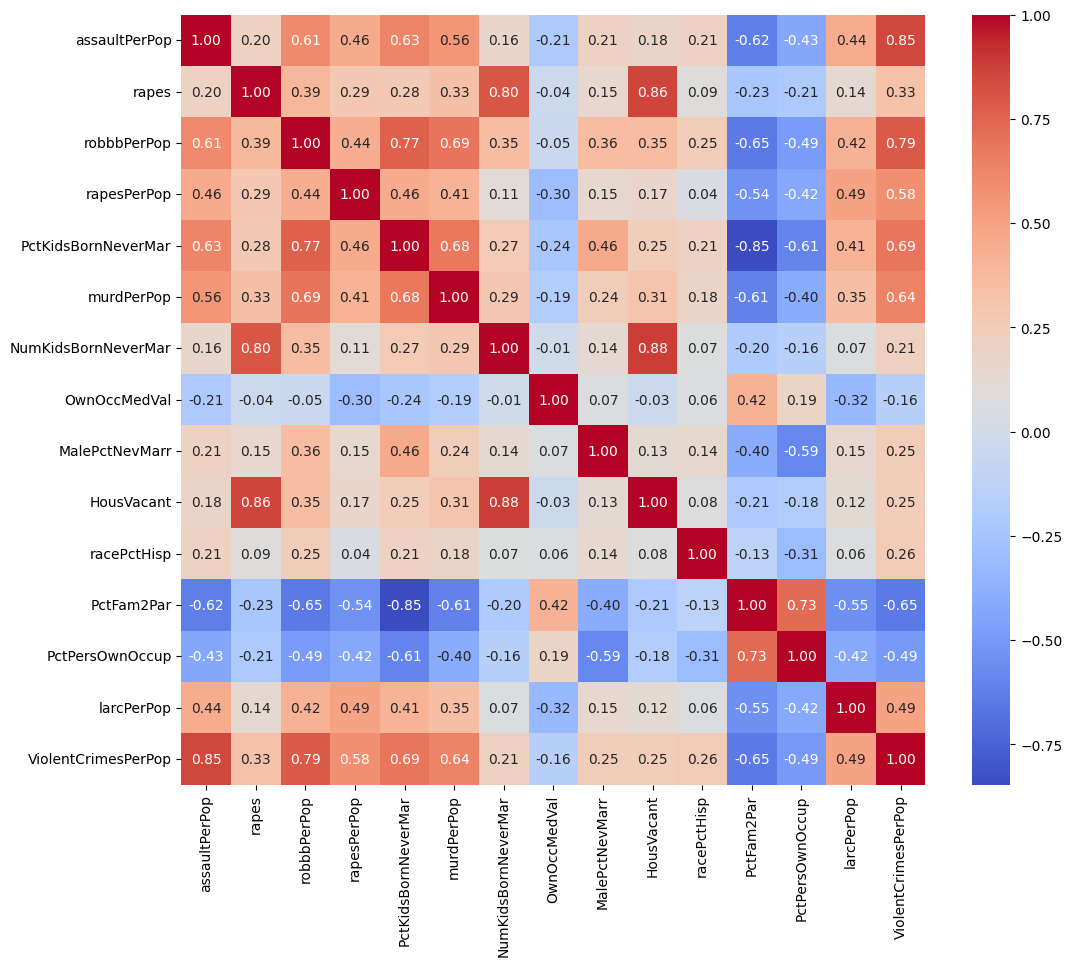

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Устанавливаем размер фигуры
plt.figure(figsize=(12, 10))

# Создаем тепловую карту
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Отображаем график
plt.show()


In [27]:
# Корреляция признаков с целевой переменной
correlation_with_target = correlation_matrix['ViolentCrimesPerPop'].drop('ViolentCrimesPerPop')

# Устанавливаем порог корреляции
threshold = 0.5

# Выбираем признаки с корреляцией выше порога
relevant_features = correlation_with_target[abs(correlation_with_target) > threshold]
print("Признаки с высокой корреляцией с целевой переменной:")
print(relevant_features)


Признаки с высокой корреляцией с целевой переменной:
assaultPerPop          0.852080
robbbPerPop            0.789590
rapesPerPop            0.583146
PctKidsBornNeverMar    0.686665
murdPerPop             0.635940
PctFam2Par            -0.649762
Name: ViolentCrimesPerPop, dtype: float64


In [28]:
# Создаем верхний треугольник корреляционной матрицы
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Устанавливаем порог для корреляции
threshold = 0.9

# Находим признаки с корреляцией выше порога
high_correlation_features = [column for column in upper_triangle.columns if any(abs(upper_triangle[column]) > threshold)]

print("Признаки с высокой взаимной корреляцией:")
print(high_correlation_features)


Признаки с высокой взаимной корреляцией:
[]


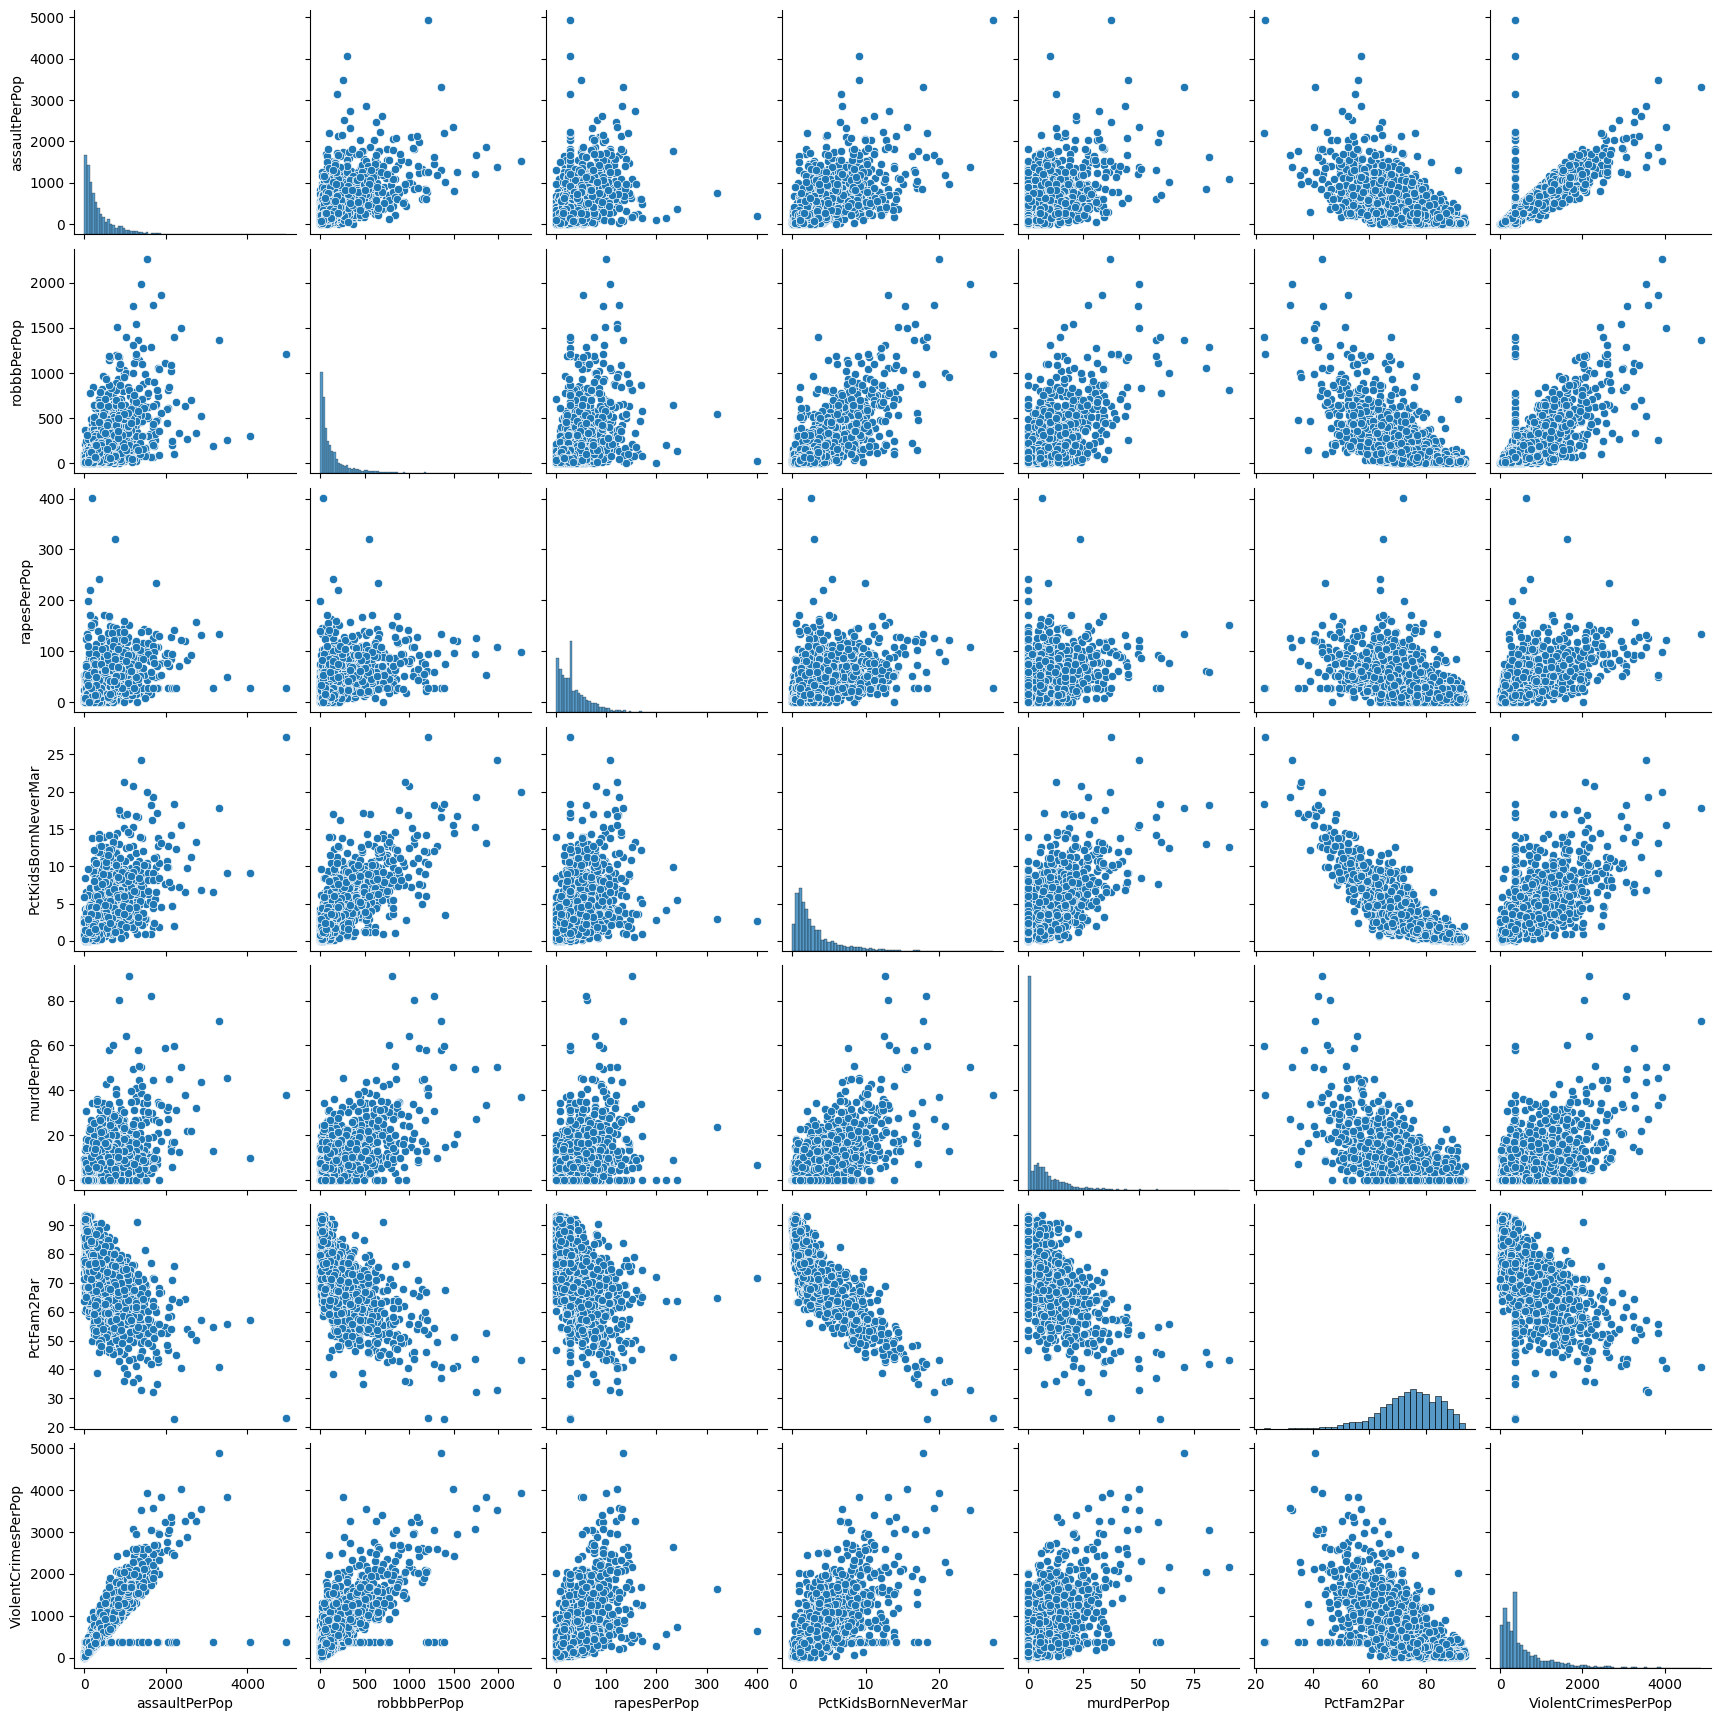

In [29]:
sns.pairplot(data[relevant_features.index.tolist() + ['ViolentCrimesPerPop']])
plt.show()

